In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20,10)

In [94]:
df1 = pd.read_csv('zameen-updated.csv')
df1.tail()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
168441,17355248,6754,https://www.zameen.com/Property/gulshan_e_maym...,House,26500000,Gadap Town,Karachi,Sindh,25.029909,67.137192,0,9.6 Marla,For Sale,6,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,9.6,5-10 Marla
168442,17355249,680,https://www.zameen.com/Property/gadap_town_gul...,House,12500000,Gadap Town,Karachi,Sindh,25.017951,67.136393,0,8 Marla,For Sale,3,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,8.0,5-10 Marla
168443,17355250,6757,https://www.zameen.com/Property/gulshan_e_maym...,House,27000000,Gadap Town,Karachi,Sindh,25.015384,67.116330,0,9.6 Marla,For Sale,6,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,9.6,5-10 Marla
168444,17355251,6752,https://www.zameen.com/Property/gulshan_e_maym...,House,11000000,Gadap Town,Karachi,Sindh,25.013265,67.120818,0,7.8 Marla,For Sale,3,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,7.8,5-10 Marla
168445,17355287,10045,https://www.zameen.com/Property/bahria_town_ka...,House,9000000,Bahria Town Karachi,Karachi,Sindh,25.113565,67.353811,3,9.4 Marla,For Sale,3,07-18-2019,ZPN Real Estate & Builders,Ali Raza,Marla,9.4,5-10 Marla


In [95]:
df1.shape

(168446, 20)

In [96]:
df1.groupby('property_type')['property_type'].agg('count')

property_type
Farm House          657
Flat              38238
House            105468
Lower Portion      9229
Penthouse           395
Room                685
Upper Portion     13774
Name: property_type, dtype: int64

In [97]:
df2 = df1.drop(['property_id','location_id','page_url','property_type','province_name','latitude','longitude','purpose','date_added','agency','agent','Area Type','Area Size','Area Category'], axis='columns')

df2.head()

,price,location,city,baths,area,bedrooms
0,10000000,G-10,Islamabad,2,4 Marla,2
1,6900000,E-11,Islamabad,3,5.6 Marla,3
2,16500000,G-15,Islamabad,6,8 Marla,5
3,43500000,Bani Gala,Islamabad,4,2 Kanal,4
4,7000000,DHA Defence,Islamabad,3,8 Marla,3


In [98]:
df2['price'] = df2['price'] / 100000
df2.head()

,price,location,city,baths,area,bedrooms
0,100.0,G-10,Islamabad,2,4 Marla,2
1,69.0,E-11,Islamabad,3,5.6 Marla,3
2,165.0,G-15,Islamabad,6,8 Marla,5
3,435.0,Bani Gala,Islamabad,4,2 Kanal,4
4,70.0,DHA Defence,Islamabad,3,8 Marla,3


In [99]:
df3 = df2.copy()  # Create a copy of df2
df3['bhk'] = df2['bedrooms']  # Assign 'bedrooms' column to 'bhk'
df3.head()

,price,location,city,baths,area,bedrooms,bhk
0,100.0,G-10,Islamabad,2,4 Marla,2,2
1,69.0,E-11,Islamabad,3,5.6 Marla,3,3
2,165.0,G-15,Islamabad,6,8 Marla,5,5
3,435.0,Bani Gala,Islamabad,4,2 Kanal,4,4
4,70.0,DHA Defence,Islamabad,3,8 Marla,3,3


In [100]:
df3.drop(columns=['bedrooms'], inplace=True)
df3.head()

,price,location,city,baths,area,bhk
0,100.0,G-10,Islamabad,2,4 Marla,2
1,69.0,E-11,Islamabad,3,5.6 Marla,3
2,165.0,G-15,Islamabad,6,8 Marla,5
3,435.0,Bani Gala,Islamabad,4,2 Kanal,4
4,70.0,DHA Defence,Islamabad,3,8 Marla,3


In [101]:
df3.drop(columns=['city'], inplace=True)
df3.head()

,price,location,baths,area,bhk
0,100.0,G-10,2,4 Marla,2
1,69.0,E-11,3,5.6 Marla,3
2,165.0,G-15,6,8 Marla,5
3,435.0,Bani Gala,4,2 Kanal,4
4,70.0,DHA Defence,3,8 Marla,3


In [102]:
def convert_to_sqft(area):
    value, unit = area.replace(',', '').split()  # Remove commas and split
    value = float(value)  # Convert number to float
    
    if unit == 'Marla':
        return value * 272.251  # Convert Marla to square feet
    elif unit == 'Kanal':
        return value * 20 * 272.251  # Convert Kanal to square feet
    else:
        return None  # Handle unexpected values

# Apply function and create new column
df3['total_sqft'] = df3['area'].apply(convert_to_sqft)

# Drop the original 'area' column
df3.drop(columns=['area'], inplace=True)

# Display updated DataFrame
df3.head()

,price,location,baths,bhk,total_sqft
0,100.0,G-10,2,2,1089.0040
1,69.0,E-11,3,3,1524.6056
2,165.0,G-15,6,5,2178.0080
3,435.0,Bani Gala,4,4,10890.0400
4,70.0,DHA Defence,3,3,2178.0080


In [103]:
df3.shape

(168446, 5)

In [104]:
df3.isnull().sum()

price         0
location      0
baths         0
bhk           0
total_sqft    0
dtype: int64

In [105]:
df3['bhk'].unique()

array([ 2,  3,  5,  4,  8,  7,  0,  1,  6, 10, 12,  9, 11, 14, 15, 16, 13,
       18, 28, 25, 21, 68, 27])

In [106]:
df3[df3.bhk>20]

,price,location,baths,bhk,total_sqft
120075,13.0,Satellite Town,0,28,10890.040
129557,9600.0,Gulberg,0,25,43560.160
130132,3.0,G-14,0,21,6534.024
139738,13.0,Satellite Town,0,28,10890.040
140891,25.0,North Nazimabad,0,68,35937.132
144418,5.5,Jamshed Town,0,25,16335.060
144837,800.0,Gulraiz Housing Scheme,0,27,16335.060
152009,9.0,Gulshan-e-Iqbal Town,0,25,16335.060
164716,13.0,Satellite Town,0,28,10890.040
164717,13.0,Satellite Town,0,28,10890.040


In [107]:
df3 = df3[df3.bhk <= 20]
df3.shape

(168436, 5)

In [108]:
df4 = df3.copy()
df4['price_per_sqft'] = df4['price']*100000/df4['total_sqft']
df4.head()

,price,location,baths,bhk,total_sqft,price_per_sqft
0,100.0,G-10,2,2,1089.0040,9182.702727
1,69.0,E-11,3,3,1524.6056,4525.760630
2,165.0,G-15,6,5,2178.0080,7575.729749
3,435.0,Bani Gala,4,4,10890.0400,3994.475686
4,70.0,DHA Defence,3,3,2178.0080,3213.945954


In [109]:
df4['price_per_sqft'].replace([np.inf, -np.inf], np.nan, inplace=True)

C:\Users\hassa\AppData\Local\Temp\ipykernel_4064\3808995197.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df4['price_per_sqft'].replace([np.inf, -np.inf], np.nan, inplace=True)


In [110]:
df4.dropna(subset=['price_per_sqft'], inplace=True)

In [111]:
df4_stats = df4['price_per_sqft'].describe()
df4_stats

count    1.684240e+05
mean     6.096218e+03
std      1.711058e+04
min      0.000000e+00
25%      4.591351e+01
50%      5.876930e+03
75%      8.723568e+03
max      5.509622e+06
Name: price_per_sqft, dtype: float64

In [112]:
df4.location = df4.location.apply(lambda x: x.strip())
location_stats = df4['location'].value_counts(ascending=False)
location_stats

location
DHA Defence                  22046
Bahria Town Karachi           8548
Bahria Town Rawalpindi        8502
Bahria Town                   6427
Gulistan-e-Jauhar             5877
                             ...  
Gulshan-e-Ghazian                1
Central Avenue                   1
NHA Housing Society              1
Farid Court Road                 1
Khawaja Ahmed Hassan Road        1
Name: count, Length: 1509, dtype: int64

In [113]:
location_stats.values.sum()

np.int64(168424)

In [114]:
len(location_stats[location_stats>10])

684

In [115]:
len(location_stats)

1509

In [116]:
len(location_stats[location_stats<=10])

825

In [117]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Pakki Thatti                 10
Misri Shah                   10
Mian Amiruddin Park          10
Chaman Park                  10
Dubban Pura                  10
                             ..
Gulshan-e-Ghazian             1
Central Avenue                1
NHA Housing Society           1
Farid Court Road              1
Khawaja Ahmed Hassan Road     1
Name: count, Length: 825, dtype: int64

In [118]:
len(df4.location.unique())

1509

In [119]:
df4.location = df4.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df4.location.unique())

685

In [120]:
df4.head(10)

,price,location,baths,bhk,total_sqft,price_per_sqft
0,100.0,G-10,2,2,1089.0040,9182.702727
1,69.0,E-11,3,3,1524.6056,4525.760630
2,165.0,G-15,6,5,2178.0080,7575.729749
3,435.0,Bani Gala,4,4,10890.0400,3994.475686
4,70.0,DHA Defence,3,3,2178.0080,3213.945954
5,345.0,Ghauri Town,8,8,8712.0320,3960.040551
6,270.0,Korang Town,8,8,5445.0200,4958.659472
7,78.0,E-11,2,2,1687.9562,4620.972985
8,500.0,DHA Defence,7,7,5445.0200,9182.702727
9,400.0,F-11,5,5,5445.0200,7346.162181


In [121]:
df4[df4.total_sqft/df4.bhk<300].head()

,price,location,baths,bhk,total_sqft,price_per_sqft
25,68.0,Koral Town,4,4,1089.0040,6244.237854
68,32.0,Chungi Amar Sadhu,2,3,816.7530,3917.953163
80,55.0,other,3,3,680.6275,8080.778399
96,60.0,Raza Abad,2,4,680.6275,8815.394617
118,50.0,Chakri Road,5,6,1361.2550,3673.081091


In [122]:
df4.shape

(168424, 6)

In [123]:
df5 = df4[~(df4.total_sqft/df4.bhk<300)]
df5.shape

(154468, 6)

In [124]:
df5.price_per_sqft.describe()

count    154468.000000
mean       5786.292800
std        6123.263759
min           0.000000
25%          37.510942
50%        5601.448663
75%        8448.086508
max      918270.272653
Name: price_per_sqft, dtype: float64

In [125]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df6 = remove_pps_outliers(df5)
df6.shape

(109482, 6)

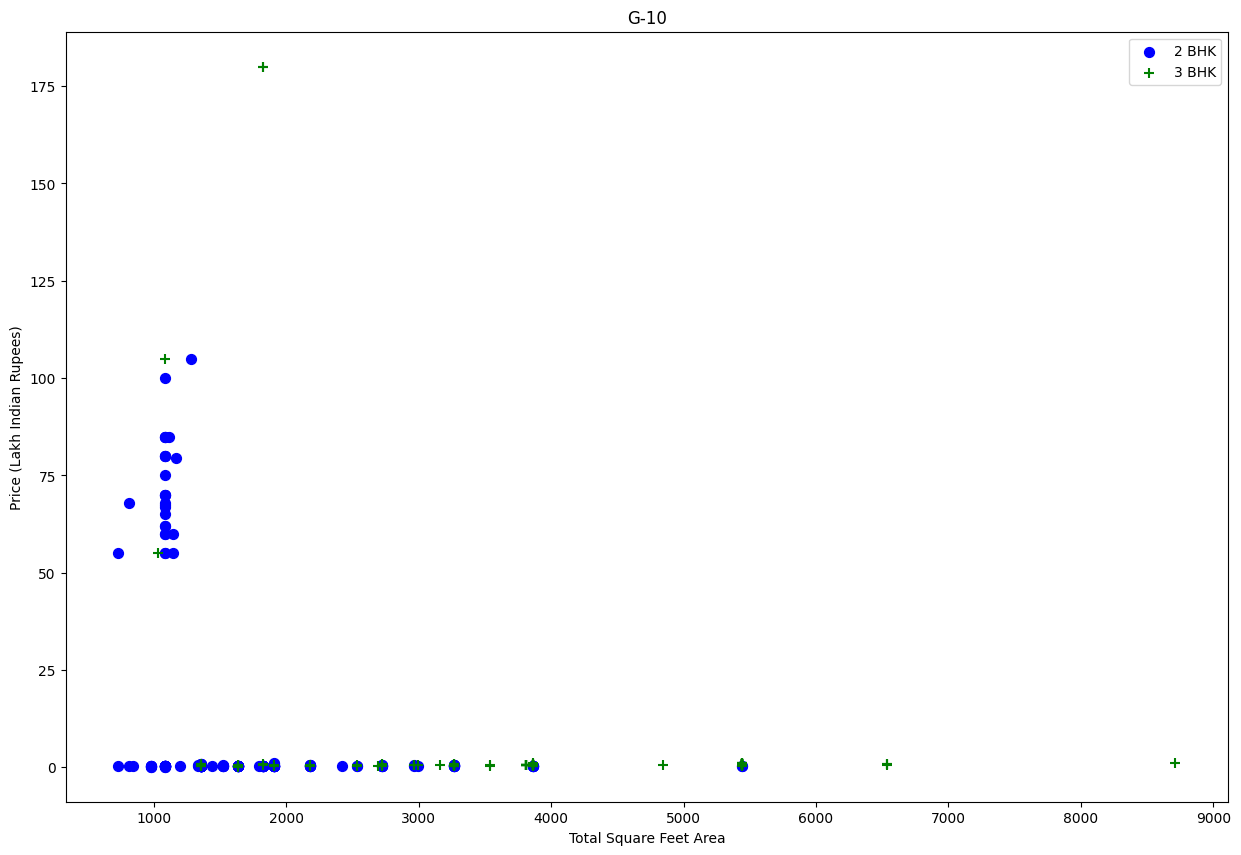

In [126]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df6,"G-10")

In [127]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df7 = remove_bhk_outliers(df6)
# df8 = df7.copy()
df7.shape

(66856, 6)

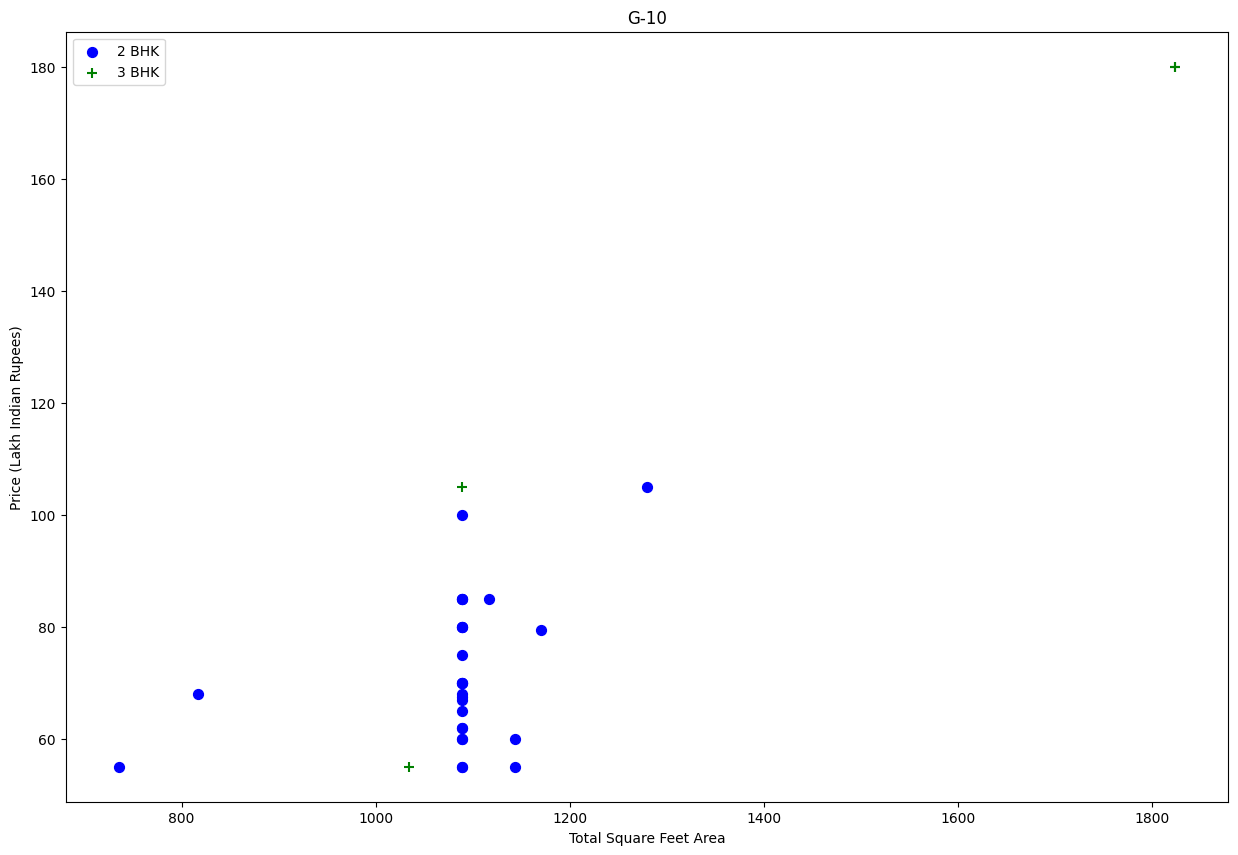

In [128]:
plot_scatter_chart(df7,"G-10")

Text(0, 0.5, 'Count')

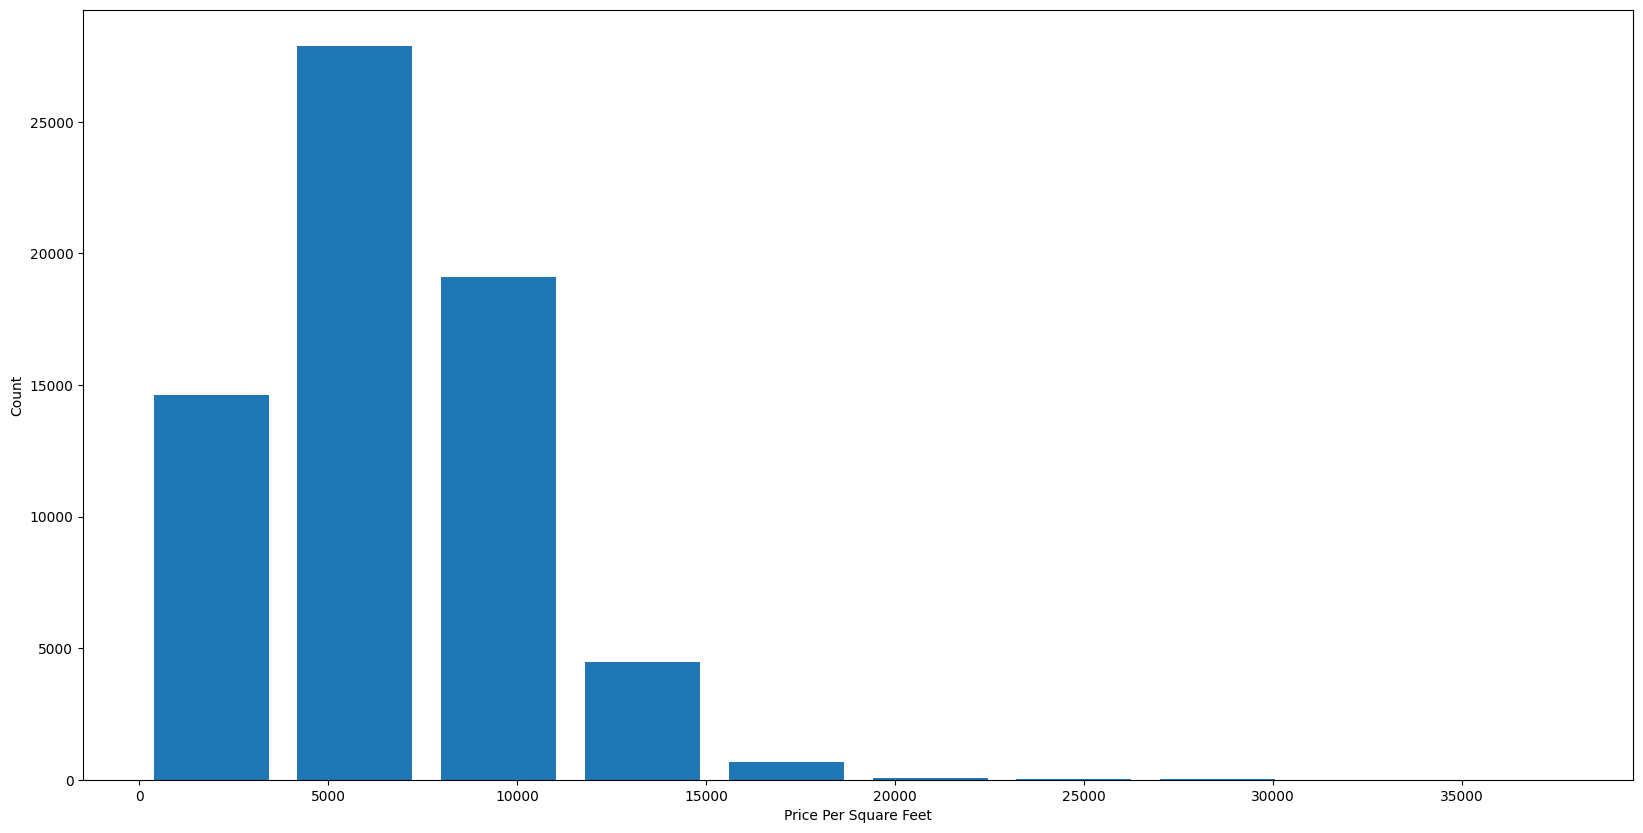

In [129]:
plt.rcParams["figure.figsize"] = (20,10)
plt.hist(df7.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [130]:
df7.baths.unique()

array([ 2,  8,  0,  1,  3,  6,  5,  7, 10,  4,  9, 13, 14, 12, 11])

Text(0, 0.5, 'Count')

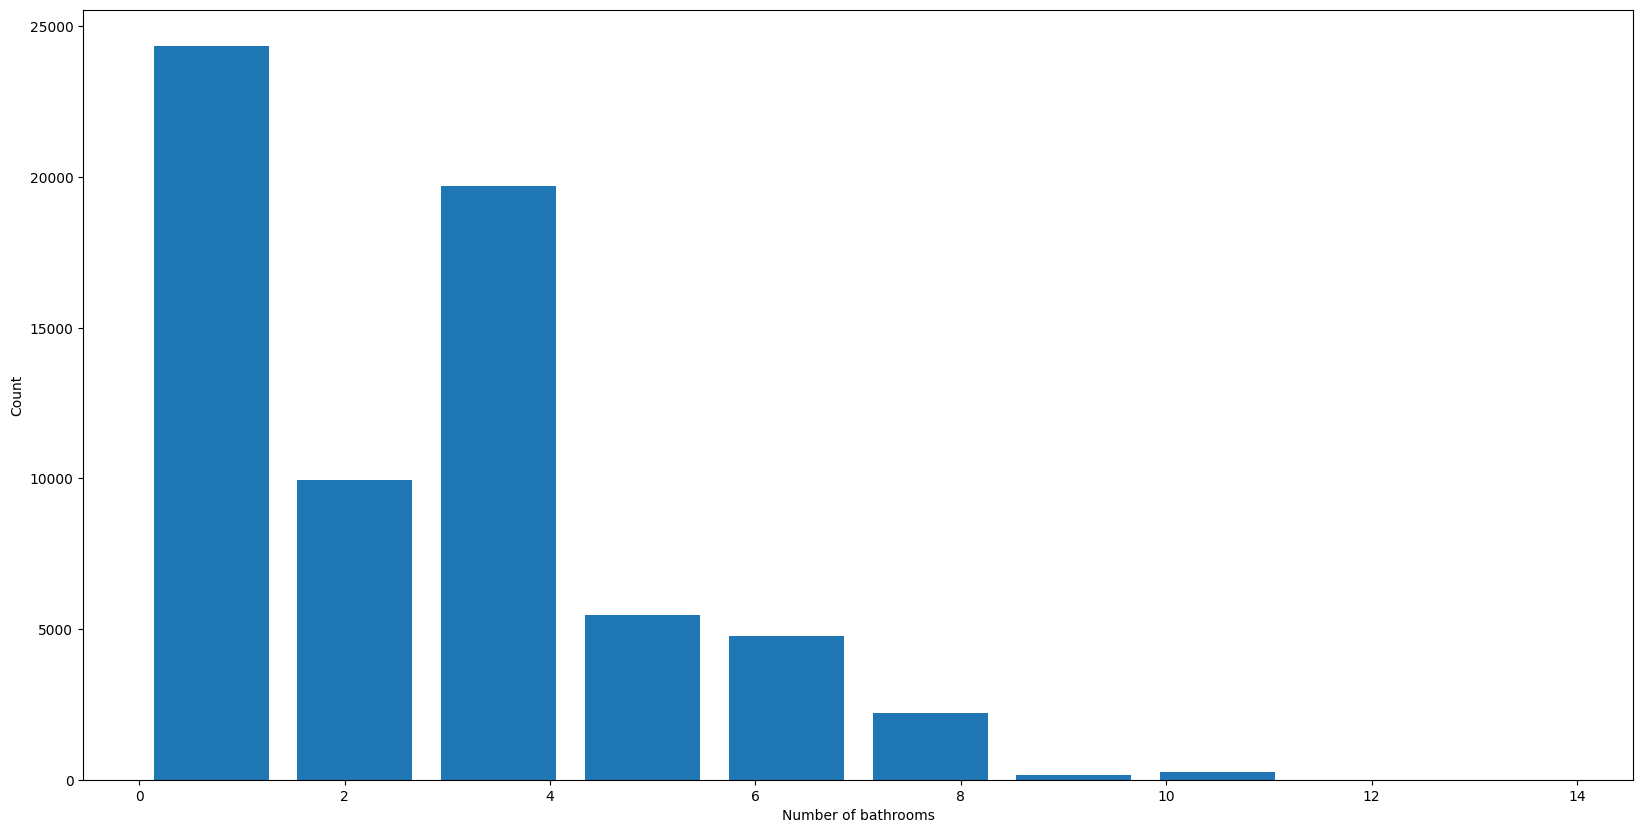

In [131]:
plt.hist(df7.baths,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [132]:
df7[df7.baths>10]

,price,location,baths,bhk,total_sqft,price_per_sqft
31398,3.0,D-12,13,10,6534.024,45.913514
55284,6.5,F-8,14,14,21780.080,29.843784
61504,2.3,G-14,12,10,6534.024,35.200360
61507,2.5,G-14,14,10,8167.530,30.609009
102700,1250.0,Shadman 2,11,11,10890.040,11478.378408


In [133]:
df7[df7.baths>df7.bhk+2]

,price,location,baths,bhk,total_sqft,price_per_sqft
214,35.0,Abul Hassan Isphani Road,3,0,1361.2550,2571.156763
1083,150.0,Afshan Colony,3,0,2722.5100,5509.621636
1299,80.0,Airport,8,0,1306.8048,6121.801818
1951,105.0,Al Kareem Garden,6,0,1361.2550,7713.470290
2779,57.0,Allahabad Road,3,0,1089.0040,5234.140554
...,...,...,...,...,...,...
108641,120.0,other,3,0,1633.5060,7346.162181
108706,99.0,other,6,0,1361.2550,7272.700559
108910,450.0,other,8,0,4900.5180,9182.702727
108958,350.0,other,9,6,5445.0200,6427.891909


In [134]:
df8 = df7[df7.baths<df7.bhk+2]
df8.shape

(64660, 6)

In [135]:
df7.shape

(66856, 6)

In [136]:
df8.head(2)

,price,location,baths,bhk,total_sqft,price_per_sqft
1,0.9,7th Avenue,2,2,1742.4064,51.652703
2,10.0,7th Avenue,8,8,10890.0400,91.827027


In [137]:
df10 = df8.drop(['price_per_sqft'],axis='columns')
df10.head(3)

,price,location,baths,bhk,total_sqft
1,0.9,7th Avenue,2,2,1742.4064
2,10.0,7th Avenue,8,8,10890.0400
3,60.0,7th Avenue,0,0,2722.5100


In [138]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,7th Avenue,9th Avenue,ASF Tower,AWT Army Welfare Trust,Aashiana Road,Abdali Road,Abdalians Cooperative Housing Society,Abid Town,Abul Hassan Isphani Road,Acro Green - Bankers Avenue,...,Younas Town,Yousaf Colony,Yousaf Town,Zaheer Villas,Zaitoon - New Lahore City,Zamzama,Zaraj Housing Scheme,Zia Colony,Zubaida Park,other
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [139]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,price,location,baths,bhk,total_sqft,7th Avenue,9th Avenue,ASF Tower,AWT Army Welfare Trust,Aashiana Road,...,Westridge,Younas Town,Yousaf Colony,Yousaf Town,Zaheer Villas,Zaitoon - New Lahore City,Zamzama,Zaraj Housing Scheme,Zia Colony,Zubaida Park
1,0.90,7th Avenue,2,2,1742.4064,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,10.00,7th Avenue,8,8,10890.0400,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,60.00,7th Avenue,0,0,2722.5100,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.17,7th Avenue,1,2,1361.2550,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,1.90,7th Avenue,0,0,1361.2550,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [140]:
df12 = df11.drop('location',axis='columns')
df12.head(2)

,price,baths,bhk,total_sqft,7th Avenue,9th Avenue,ASF Tower,AWT Army Welfare Trust,Aashiana Road,Abdali Road,...,Westridge,Younas Town,Yousaf Colony,Yousaf Town,Zaheer Villas,Zaitoon - New Lahore City,Zamzama,Zaraj Housing Scheme,Zia Colony,Zubaida Park
1,0.9,2,2,1742.4064,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,10.0,8,8,10890.0400,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [141]:
df12.shape

(64660, 687)

In [142]:
X = df12.drop(['price'],axis='columns')
X.head(3)

,baths,bhk,total_sqft,7th Avenue,9th Avenue,ASF Tower,AWT Army Welfare Trust,Aashiana Road,Abdali Road,Abdalians Cooperative Housing Society,...,Westridge,Younas Town,Yousaf Colony,Yousaf Town,Zaheer Villas,Zaitoon - New Lahore City,Zamzama,Zaraj Housing Scheme,Zia Colony,Zubaida Park
1,2,2,1742.4064,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,8,8,10890.0400,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,0,2722.5100,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [143]:
X.shape

(64660, 686)

In [144]:
y = df12.price
y.head(3)

1     0.9
2    10.0
3    60.0
Name: price, dtype: float64

In [145]:
len(y)

64660

In [146]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=70)

In [147]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.3547871112086969

In [148]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=3, test_size=0.3, random_state=70)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.35478711, 0.40753282, 0.33854318])

In [149]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.01)  # Removes columns with low variance
X_train_reduced = selector.fit_transform(X_train)
X_test_reduced = selector.transform(X_test)

In [150]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k=1000)  # Keep 1000 best features
X_train_reduced = selector.fit_transform(X_train, y_train)
X_test_reduced = selector.transform(X_test)

C:\Users\hassa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=1000 is greater than n_features=686. All the features will be returned.
  warnings.warn(


In [151]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=10)  # Adjust alpha for best performance
ridge.fit(X_train, y_train)
print("Ridge Score:", ridge.score(X_test, y_test))

Ridge Score: 0.35180102726307017


In [152]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)  # Adjust alpha for best performance
lasso.fit(X_train, y_train)
print("Lasso Score:", lasso.score(X_test, y_test))


Lasso Score: 0.3382517047404018


In [154]:
df12.isnull().sum()

price                        0
baths                        0
bhk                          0
total_sqft                   0
7th Avenue                   0
                            ..
Zaitoon - New Lahore City    0
Zamzama                      0
Zaraj Housing Scheme         0
Zia Colony                   0
Zubaida Park                 0
Length: 687, dtype: int64

In [156]:
df12.fillna(df12.mean(), inplace=True)  # For numerical columns
df12.dropna(inplace=True) 

In [160]:
df12[~np.isfinite(df12)].sum()

price                        0.0
baths                        0.0
bhk                          0.0
total_sqft                   0.0
7th Avenue                     0
                            ... 
Zaitoon - New Lahore City      0
Zamzama                        0
Zaraj Housing Scheme           0
Zia Colony                     0
Zubaida Park                   0
Length: 687, dtype: object

In [162]:
df12 = df12.replace([np.inf, -np.inf], np.nan)
df12.dropna(inplace=True)

<Axes: ylabel='price'>

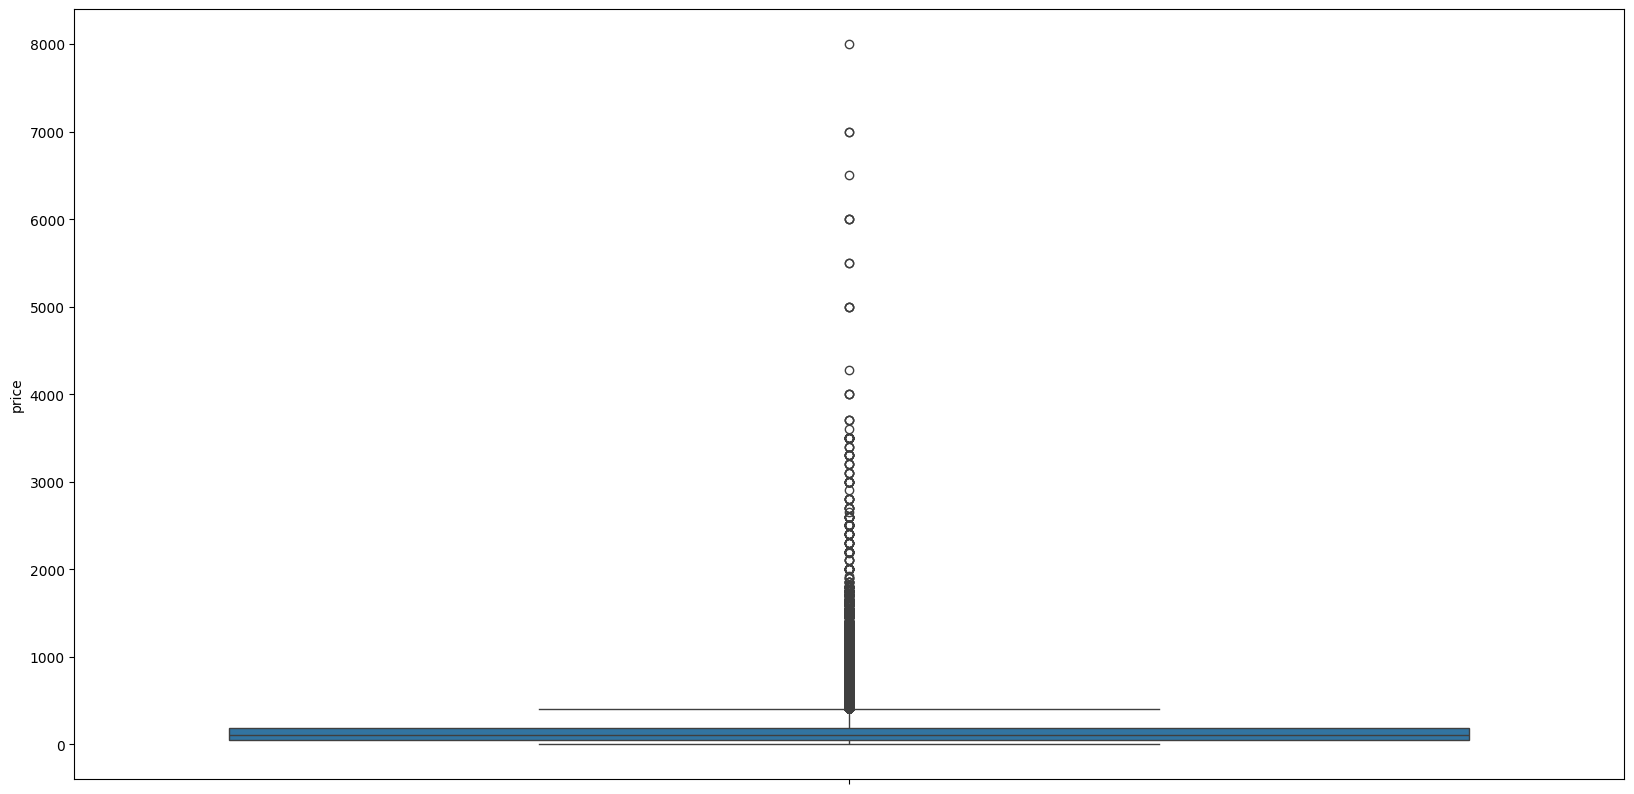

In [165]:
import seaborn as sns
sns.boxplot(df12["price"])

In [169]:
Q1 = df12["price"].quantile(0.25)
Q3 = df12["price"].quantile(0.75)
IQR = Q3 - Q1
df12 = df12[(df12["price"] >= Q1 - 1.5 * IQR) & (df12["price"] <= Q3 + 1.5 * IQR)]
df12.price.describe()

count    56067.000000
mean        96.673857
std         74.808391
min          0.000010
25%         38.000000
50%         90.000000
75%        140.000000
max        293.000000
Name: price, dtype: float64

In [170]:
df12.shape

(56067, 687)

In [171]:
X = df12.drop(['price'],axis='columns')
X.head(3)

,baths,bhk,total_sqft,7th Avenue,9th Avenue,ASF Tower,AWT Army Welfare Trust,Aashiana Road,Abdali Road,Abdalians Cooperative Housing Society,...,Westridge,Younas Town,Yousaf Colony,Yousaf Town,Zaheer Villas,Zaitoon - New Lahore City,Zamzama,Zaraj Housing Scheme,Zia Colony,Zubaida Park
1,2,2,1742.4064,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,8,8,10890.0400,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,0,2722.5100,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [172]:
y = df12.price
y.head()

1     0.90
2    10.00
3    60.00
4     0.17
5     1.90
Name: price, dtype: float64

In [173]:
X.shape

(56067, 686)

In [174]:
len(y)

56067

In [191]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=30)

In [192]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.6101850078406348

In [193]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

# Funtion for grid search CV, and the code defined beneath is also called hyper parameter tuning

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params':{
                'fit_intercept':[True, False]
            }
        },
        'lasso':{
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random','cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,-1.772508e+10,{'fit_intercept': True}
1,lasso,3.216248e-01,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,8.429550e-01,"{'criterion': 'squared_error', 'splitter': 'ra..."


In [218]:
def predict_price(location,sqft,baths,bhk):
    if location in X.columns:
        loc_index = np.where(X.columns==location)[0][0]
    else:
        loc_index = -1
        
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = baths
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    x_df = pd.DataFrame([x], columns=X.columns)

    return model.predict(x_df)[0]

    # return lr_clf.predict([x])[0]

In [219]:
predict_price('E-11',4,4,1524.6056)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Bahria Town
- G-15


In [205]:
X.columns

Index(['baths', 'bhk', 'total_sqft', '7th Avenue', '9th Avenue', 'ASF Tower',
       'AWT Army Welfare Trust', 'Aashiana Road', 'Abdali Road',
       'Abdalians Cooperative Housing Society',
       ...
       'Westridge', 'Younas Town', 'Yousaf Colony', 'Yousaf Town',
       'Zaheer Villas', 'Zaitoon - New Lahore City', 'Zamzama',
       'Zaraj Housing Scheme', 'Zia Colony', 'Zubaida Park'],
      dtype='object', length=686)

In [206]:
np.where(X.columns=='AWT Army Welfare Trust')[0][0]

np.int64(6)

In [211]:
df4.head(3)

,price,location,baths,bhk,total_sqft,price_per_sqft
0,100.0,G-10,2,2,1089.0040,9182.702727
1,69.0,E-11,3,3,1524.6056,4525.760630
2,165.0,G-15,6,5,2178.0080,7575.729749


In [209]:
import pickle

with open('pakistan_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [210]:
import json

columns = {
    'data_columns': [col.lower() for col in X.columns]
}

with open('columns.json','w') as f:
    f.write(json.dumps(columns))